<a href="https://colab.research.google.com/github/FatmaAouani/PCA-with-Varimax-Rotation/blob/main/PCA_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## 1- Importing the libraries

In [ ]:
!pip install factor_analyzer

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2- Importing the dataset: PACS Fine Particles Samples

In [165]:
dataset = pd.read_csv('pca1.csv', sep=";" )
X = dataset.iloc[:, :].values
dataset.head()

,F,NA,MG,AL,SI,S,CL,K,CA,TI,...,FE,NI,CU,ZN,BR,PB,OC,EC,SO4,NO3
0,0.883,6.93,0.43,4.66,3.02,2.95,5.95,1.64,1.78,0.083,...,4.530,0.765,0.044,0.225,0.419,2.53,7.54,1.42,10.300,0.638
1,0.090,0.19,0.00,0.19,0.39,2.60,0.79,0.19,0.11,0.011,...,0.227,0.043,0.033,0.106,0.419,0.94,15.30,1.80,6.900,2.900
2,0.006,9.94,1.36,8.09,20.50,2.35,8.83,1.06,2.24,0.483,...,5.660,0.767,0.048,0.250,1.540,4.74,23.60,2.40,7.764,0.324


## 3- Standardizing the Dataset

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## 4- Applying PCA

In [167]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, method='principal', rotation="varimax")
fa.fit(X)

## 5-  Results

In [169]:
fa.get_factor_variance()

(array([14.70351415,  8.29648585]),
 array([0.63928322, 0.36071678]),
 array([0.63928322, 1.        ]))

Note: The function above returns the factor variances, the proportional factor variances and the cumulative factor variances.

## Factorial weights matrix obtained for fine particles

In [170]:
pca = fa.loadings_
np.savetxt("results_pca.csv", pca, delimiter=",", header='')

Note: The function above returns the weights of the principal components for each of the species in our dataset.

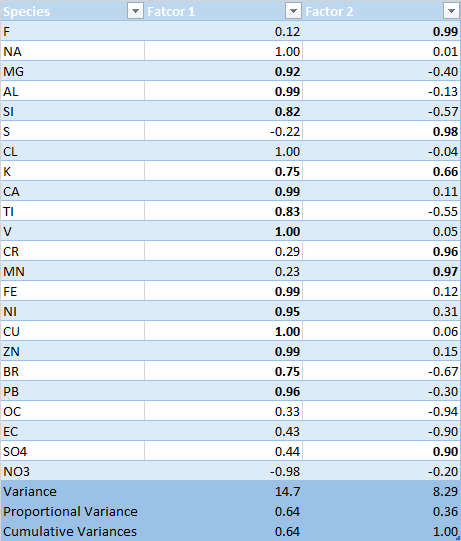

Note: values above 0.60 were highlighted in the table.

## Vizualizing the Principal Components

Text(0, 0.5, 'PC2')

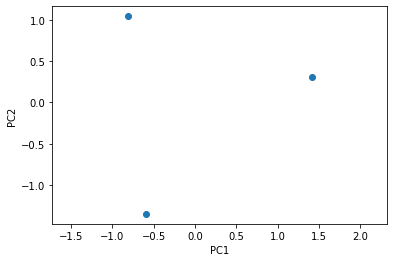

In [172]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.xlabel("PC1")
plt.ylabel("PC2")

# 6- Comments

A total of 23 variables were considered in the PCA with Varimax
rotation and a total of two components were extracted covering 23% of
the data variance for fine particles as shown in the table above. The first factor was related to Mg, Na, Al, Si, K, Ca, TI, V, Fe, Ni, Cu, Zn, Br and Pb, and it explained 14.7% of the variance. The second factor was related to F, S, K, Cr, Mn and SO4. These 2 fingerprint was compared to the results from EPA CM8.2 Sources but we couldn't associate this factor to a single source from the ones available in the PACS dataset.
